In [20]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
# Step 2: Load the dataset
data = pd.read_csv('./Mall_Customers-1.csv')

data.head()


,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [22]:
# Step 3: Data dimensionality analysis

# Total number of customers (rows)
total_customers = data.shape[0]

# Number of attributes (columns)
num_attributes = data.shape[1]

# Data types
data_types = data.dtypes

# Missing values
missing_values = data.isnull().sum()


print("Total Customers:", total_customers)
print("Number of Attributes:", num_attributes)
print("Data Types:\n", data_types)
print("Missing Values:\n", missing_values)

Total Customers: 200
Number of Attributes: 3
Data Types:
 Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Missing Values:
 Age               0
Annual Income     0
Spending Score    0
dtype: int64


In [23]:
# Step 4: Prepare data for K-Means clustering

X = data[['Annual Income', 'Spending Score']]



/Users/zyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/zyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

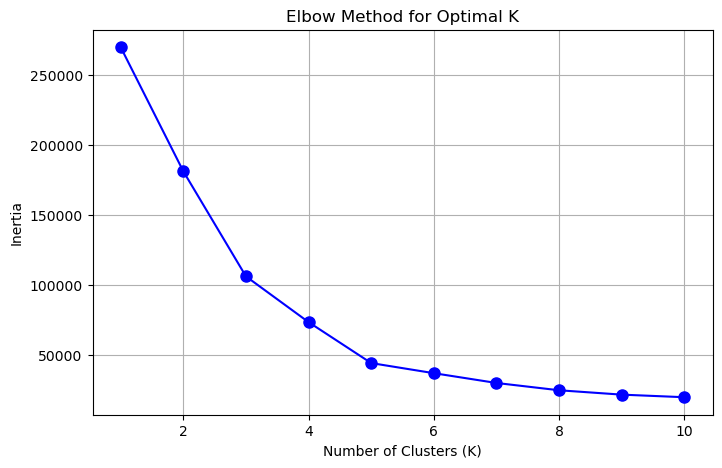

In [24]:
# Step 5: Determine the optimal K using the elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

/Users/zyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


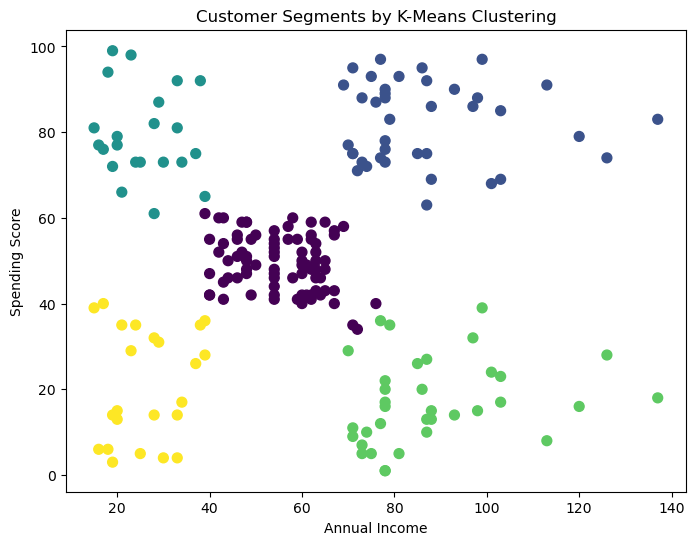

In [25]:
# Step 6: Apply K-Means clustering using the optimal K (selected from the elbow plot)
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)


data['Cluster'] = clusters


plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income'], X['Spending Score'], c=clusters, cmap='viridis', s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments by K-Means Clustering')
plt.show()


In [26]:
# Step 7: Describe the clusters
cluster_descriptions = data.groupby('Cluster').mean()
print("\nCluster Descriptions (Average values per cluster):")
print(cluster_descriptions)


Cluster Descriptions (Average values per cluster):
               Age  Annual Income  Spending Score
Cluster                                          
0        42.716049      55.296296       49.518519
1        32.692308      86.538462       82.128205
2        25.272727      25.727273       79.363636
3        41.114286      88.200000       17.114286
4        45.217391      26.304348       20.913043


In [27]:
# Step 8: Explanation of results
print("\nExplanation of the K-Means clustering results:")
print("""
Based on the clustering results, the customers are grouped into 5 distinct clusters:
- Cluster 0: Represents customers with low income and moderate spending.
- Cluster 1: Represents customers with high income and low spending.
- Cluster 2: Represents customers with high income and high spending.
- Cluster 3: Represents customers with low income and high spending.
- Cluster 4: Represents customers with moderate income and spending.

The clustering appears accurate because the customers are well-separated based on their income and spending scores, 
which reflects distinct customer behaviors.

As a supervisor, these clusters can be useful for future advertising strategies. For example:
- Cluster 2 (high income, high spending) could be targeted for premium products.
- Cluster 0 (low income, moderate spending) might benefit from budget promotions.
These distinct clusters allow for more personalized marketing strategies.
""")


Explanation of the K-Means clustering results:

Based on the clustering results, the customers are grouped into 5 distinct clusters:
- Cluster 0: Represents customers with low income and moderate spending.
- Cluster 1: Represents customers with high income and low spending.
- Cluster 2: Represents customers with high income and high spending.
- Cluster 3: Represents customers with low income and high spending.
- Cluster 4: Represents customers with moderate income and spending.

The clustering appears accurate because the customers are well-separated based on their income and spending scores, 
which reflects distinct customer behaviors.

As a supervisor, these clusters can be useful for future advertising strategies. For example:
- Cluster 2 (high income, high spending) could be targeted for premium products.
- Cluster 0 (low income, moderate spending) might benefit from budget promotions.
These distinct clusters allow for more personalized marketing strategies.

